In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [17]:
credit_df = pd.read_csv("credit.csv")

In [18]:
credit_df.head(10)  

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [19]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [20]:
credit_df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [21]:
credit_df.shape

(1000, 17)

In [22]:
credit_df['default'].value_counts()

no     700
yes    300
Name: default, dtype: int64

In [23]:
# This is only for discussion about how encoding will be done
np.sort(credit_df['checking_balance'].unique())

array(['1 - 200 DM', '< 0 DM', '> 200 DM', 'unknown'], dtype=object)

In [24]:
credit_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:

for feature in credit_df.columns: # Loop through all columns in the dataframe
    if credit_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        credit_df[feature] = le.fit_transform(credit_df[feature].astype(str))
        print(feature)
        print(zip(le.classes_, le.transform(le.classes_)))
        print(dict(zip(le.classes_, le.transform(le.classes_))))
        print()
            

checking_balance
{'1 - 200 DM': 0, '< 0 DM': 1, '> 200 DM': 2, 'unknown': 3}

credit_history
{'critical': 0, 'good': 1, 'perfect': 2, 'poor': 3, 'very good': 4}

purpose
{'business': 0, 'car': 1, 'car0': 2, 'education': 3, 'furniture/appliances': 4, 'renovations': 5}

savings_balance
{'100 - 500 DM': 0, '500 - 1000 DM': 1, '< 100 DM': 2, '> 1000 DM': 3, 'unknown': 4}

employment_duration
{'1 - 4 years': 0, '4 - 7 years': 1, '< 1 year': 2, '> 7 years': 3, 'unemployed': 4}

other_credit
{'bank': 0, 'none': 1, 'store': 2}

housing
{'other': 0, 'own': 1, 'rent': 2}

job
{'management': 0, 'skilled': 1, 'unemployed': 2, 'unskilled': 3}

phone
{'no': 0, 'yes': 1}

default
{'no': 0, 'yes': 1}



In [ ]:
#for feature in credit_df.columns: # Loop through all columns in the dataframe
#    if credit_df[feature].dtype == 'object': # Only apply for columns with categorical strings
#        credit_df[feature] = pd.Categorical(credit_df[feature]).codes # Replace strings with an integer
    

In [ ]:
# Multiple methods exist
# Label Encoder  

# OR

# manually encoding as shown below ***** this has certain advantages 
# credit_df['checking_balance'] = credit_df['checking_balance'].replace({'< 0 DM':0, '1 - 200 DM':1, '> 200 DM':2, 'unknown':3 })


# Get dummies can also be used it will have different impact on the model (Not commonly used)


In [28]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int32
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int32
 3   purpose               1000 non-null   int32
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int32
 6   employment_duration   1000 non-null   int32
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int32
 11  housing               1000 non-null   int32
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int32
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int32
 16  default

In [29]:
credit_df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1,0
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0,1
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0,0
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0,1
5,3,36,1,3,9055,4,0,2,4,35,1,0,1,3,2,1,0
6,3,24,1,4,2835,1,3,3,4,53,1,1,1,1,1,0,0
7,0,36,1,1,6948,2,0,2,2,35,1,2,1,0,1,1,0
8,3,12,1,4,3059,3,1,2,4,61,1,1,1,3,1,0,0
9,0,30,0,1,5234,2,4,4,2,28,1,1,2,0,1,0,1


In [30]:
# Putting feature variable to X
X = credit_df.drop('default',axis=1)

# Putting response variable to y
y = credit_df['default']

In [31]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [32]:
# invoking the decision tree classifier function. 
#Restricting the depth of the tree to 10 (no particular reason for selecting this)

                                  
dt_model = DecisionTreeClassifier( max_depth = 10, random_state = 0 )

In [33]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [34]:
# Making predictions
y_pred = dt_model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix and accuracy
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.675
[[111  31]
 [ 34  24]]


In [36]:
# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       142
           1       0.44      0.41      0.42        58

    accuracy                           0.68       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.67      0.68      0.67       200



In [37]:
# Check training and testing score
# Training Score
print('Training score')
print(dt_model.score(X_train,y_train))
print('Test score')
print(dt_model.score(X_test , y_test))

Training score
0.94875
Test score
0.675


In [38]:

# Features importance in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature)

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                           Imp
checking_balance      0.162399
months_loan_duration  0.094049
credit_history        0.074624
purpose               0.034752
amount                0.250686
savings_balance       0.039407
employment_duration   0.036177
percent_of_income     0.027822
years_at_residence    0.034347
age                   0.113861
other_credit          0.027387
housing               0.042738
existing_loans_count  0.017295
job                   0.026181
dependents            0.008362
phone                 0.009912


In [39]:
class_label = ['No', 'Yes']

#### Following is Not useful to visualize large trees

In [42]:
# *****
# ***** This code can be used to print small trees. Large trees are not properly visible *****
# ***** Therefore the code is commented
# *****

#from sklearn.tree import plot_tree
#plt.figure(figsize=(70,35))
#a=plot_tree(dt_model,feature_names=list(X_train), class_names = list(class_label),fontsize=6)

In [43]:
# Visualize tree  using Graphviz website 

from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Credit_Tree_File = open('credit_tree_1.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(class_label))
#dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train))
Credit_Tree_File.close()


http://webgraphviz.com/

# Hyperparameter tuning


In [44]:
#With Hyper Parameters Tuning
from sklearn.model_selection import GridSearchCV

#making the instance
model= DecisionTreeClassifier(random_state=0)

# specify number of folds for k-fold CV
n_folds = 5

# hyper parameters to build the model on
params = {'max_depth': range(1, 20)}

#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, cv=n_folds, return_train_score=True)
#Learning
model1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 20)}, return_train_score=True)

In [45]:
# Capture scores from Grid search
scores = model1.cv_results_


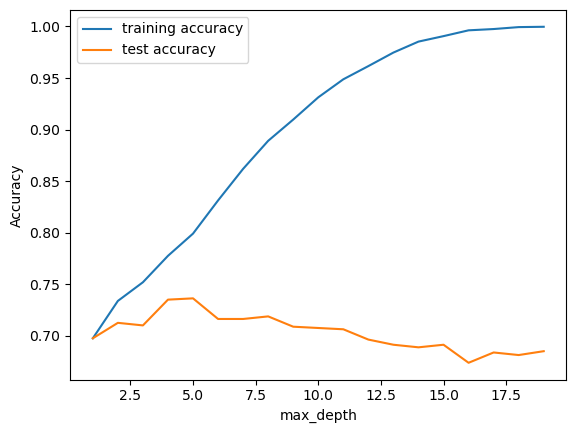

In [61]:
# Plot accuracy against max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [47]:
# Get the best hyperparameter
print("Best Hyper Parameters:",model1.best_params_)
print("Best Score:",model1.best_score_)

Best Hyper Parameters: {'max_depth': 5}
Best Score: 0.7362500000000001


### Tune multiple papameters

In [48]:
# Tune MULTIPLE parameters with Hyper Parameters Tuning

#create an instance
model= DecisionTreeClassifier(random_state=0)

# hyper parameters to build the model on
params = {'criterion':('gini','entropy'), 
          'max_depth': range(2, 10),
         'min_samples_split': range(2, 10)
         }

#Making models with hyper parameters sets
model1 = GridSearchCV(model, cv=5, param_grid=params)
#Learning
model1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(2, 10),
                         'min_samples_split': range(2, 10)})

In [49]:
print("Best Hyper Parameters:",model1.best_params_)
print("Best Score:",model1.best_score_)

Best Hyper Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 6}
Best Score: 0.7375


# Ensemble Techniques

In [50]:
dt_model = DecisionTreeClassifier( max_depth = 5, random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [51]:

#print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


In [52]:
y_pred = dt_model.predict(X_test)

In [53]:
dt_model.score(X_test , y_test)

0.715

## Ensemble learning - Bagging Classifier 

In [54]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=20, random_state=10)

bgcl = bgcl.fit(X_train, y_train)


In [55]:
y_pred = bgcl.predict(X_test)
bgcl.score(X_test, y_test)

0.76

## Ensemble  learning - RandomForest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 20, random_state=0)
rfcl = rfcl.fit(X_train, y_train)


In [57]:
test_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

0.735

# Hyperparameter tuning of RandomForest

In [58]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': range(60,160,10) ,
    'max_depth': [4,8,12] ,
    'max_features':[4,5]
    
    }
# Create a based model
rf = RandomForestClassifier(random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv=5, 
                           n_jobs = -1)

In [59]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12], 'max_features': [4, 5],
                         'n_estimators': range(60, 160, 10)})

In [60]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.77125 using {'max_depth': 12, 'max_features': 5, 'n_estimators': 70}
